In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
def df_description(df):
    """ df_description: returns a briefly description of the variables in a dataframe
        inputs: 
            - df : dataframe
        outputs:
            - None (prints information on the terminal)
    """
    display(df.head())

    print('\n\n Dataframe info: \n')
    display(df.info())

    print('\n\n Dataframe description: ')
    display(df.describe(include='all'))  
    return None

def df_nulls(df):
    pass

## Commercial actitivity

El dataset 'commercial activity' tiene las siguientes variables:
- **pk_cid** (int64)

    Identificador de cliente
- **pk_partition** (object : date)

    Fecha de ingesta de los datos. Existen 17 particiones o históricos.
- **entry_date** (object : date)

    Fecha en la que realizó la primera contratación a través de easyMoney
- **entry_channel** (object : category)

    Canal de captación del cliente. Existen 69 canales diferentes. 
- **active_customer** (float64 : bool)

    Indicador de actividad del cliente en nuestra aplicación
- **segment** (object : category)

    Segmento comercial del cliente. Existen 3 segmentos: '01 - TOP', '02 - PARTICULARES', '03 - UNIVERSITARIO'

In [14]:
commercial_activity_all = pd.read_csv('./data/commercial_activity_df.csv', index_col=0)
df_description(commercial_activity_all)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO




 Dataframe info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 318.5+ MB


None



 Dataframe description: 


,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
count,5.962924e+06,5962924,5962924,5829891,5.962924e+06,5828980
unique,NaN,17,1499,68,NaN,3
top,NaN,2019-05-28,2017-07-28,KHE,NaN,03 - UNIVERSITARIO
freq,NaN,442995,57389,3113947,NaN,3900166
mean,1.234930e+06,NaN,NaN,NaN,4.033845e-01,NaN
std,1.623020e+05,NaN,NaN,NaN,4.905767e-01,NaN
min,1.589100e+04,NaN,NaN,NaN,0.000000e+00,NaN
25%,1.112532e+06,NaN,NaN,NaN,0.000000e+00,NaN
50%,1.231097e+06,NaN,NaN,NaN,0.000000e+00,NaN
75%,1.352339e+06,NaN,NaN,NaN,1.000000e+00,NaN


In [15]:
partitions = commercial_activity_all['pk_partition'].unique()
partitions = sorted(partitions)
display(partitions)

print("Se tienen {} particiones".format(len(partitions)))

['2018-01-28',
 '2018-02-28',
 '2018-03-28',
 '2018-04-28',
 '2018-05-28',
 '2018-06-28',
 '2018-07-28',
 '2018-08-28',
 '2018-09-28',
 '2018-10-28',
 '2018-11-28',
 '2018-12-28',
 '2019-01-28',
 '2019-02-28',
 '2019-03-28',
 '2019-04-28',
 '2019-05-28']

Se tienen 17 particiones


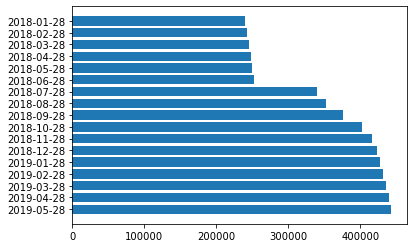

In [16]:
partitions_valuecounts = commercial_activity_all['pk_partition'].value_counts()

fig, ax = plt.subplots()
ax.barh(partitions_valuecounts.index, partitions_valuecounts[:])
plt.show()

Como se indica en el correo de John, el dataset incluye 17 particiones o históricos (*pk_partition*). Como se puede observar el número de filas o *entries* en cada partición va aumentado con el transcurso de los meses. Se espera que la última partición contenga todos los datos de las particiones anteriores (esta suposición se comprobará), y para el EDA (Exploratory Data Analysis) se trabajará con esta partición, dado que el dataset entero contiene datos duplicados.

Como se puede observar en las siguientes tablas la última partición tiene 442.995 *entries* o filas. 

In [17]:
commercial_activity_df = commercial_activity_all[  commercial_activity_all['pk_partition'] == partitions[-1]]
df_description(commercial_activity_df)
del commercial_activity_all

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
12715896,657826,2019-05-28,2015-05-24,013,1.0,02 - PARTICULARES
12715899,657817,2019-05-28,2019-05-12,NaN,0.0,NaN
12715982,657986,2019-05-28,2016-02-18,KAF,1.0,02 - PARTICULARES
12716026,657905,2019-05-28,2017-02-07,KAT,1.0,01 - TOP
12716082,657336,2019-05-28,2019-03-28,KAT,1.0,02 - PARTICULARES




 Dataframe info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442995 entries, 12715896 to 13647308
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   pk_cid           442995 non-null  int64  
 1   pk_partition     442995 non-null  object 
 2   entry_date       442995 non-null  object 
 3   entry_channel    438486 non-null  object 
 4   active_customer  442995 non-null  float64
 5   segment          438379 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 23.7+ MB


None



 Dataframe description: 


,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
count,4.429950e+05,442995,442995,438486,442995.000000,438379
unique,NaN,1,1495,65,NaN,3
top,NaN,2019-05-28,2017-07-28,KHE,NaN,03 - UNIVERSITARIO
freq,NaN,442995,3422,194727,NaN,284236
mean,1.271885e+06,NaN,NaN,NaN,0.387291,NaN
std,1.779574e+05,NaN,NaN,NaN,0.487132,NaN
min,1.606300e+04,NaN,NaN,NaN,0.000000,NaN
25%,1.141604e+06,NaN,NaN,NaN,0.000000,NaN
50%,1.280164e+06,NaN,NaN,NaN,0.000000,NaN
75%,1.419056e+06,NaN,NaN,NaN,1.000000,NaN


En las siguientes figuras, se comprueban los valores nulos en el dataframe *commercial_activity_df*. Se puede observar en la última figura que los valores nulos que aparecen en *entry_channel* y *segment* ocurren en la mayoría de casos en ambos campos a la vez. 

Los valores nulos, 4616 en el peor de los casos sobre 442995, lo que corresponde alrededor del 1% de las filas del dataframe, por lo que descartar estas filas tampoco supondrá un cambio muy drástico en los futuros resultados. 

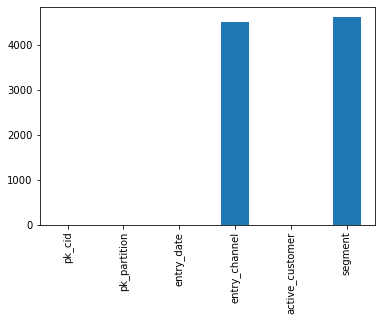

pk_cid                0
pk_partition          0
entry_date            0
entry_channel      4509
active_customer       0
segment            4616
dtype: int64

In [18]:
# Obtener los NaNs en cada columna
commercial_activity_df.isna().sum().plot( kind="bar" )
plt.show()
display(commercial_activity_df.isna().sum())

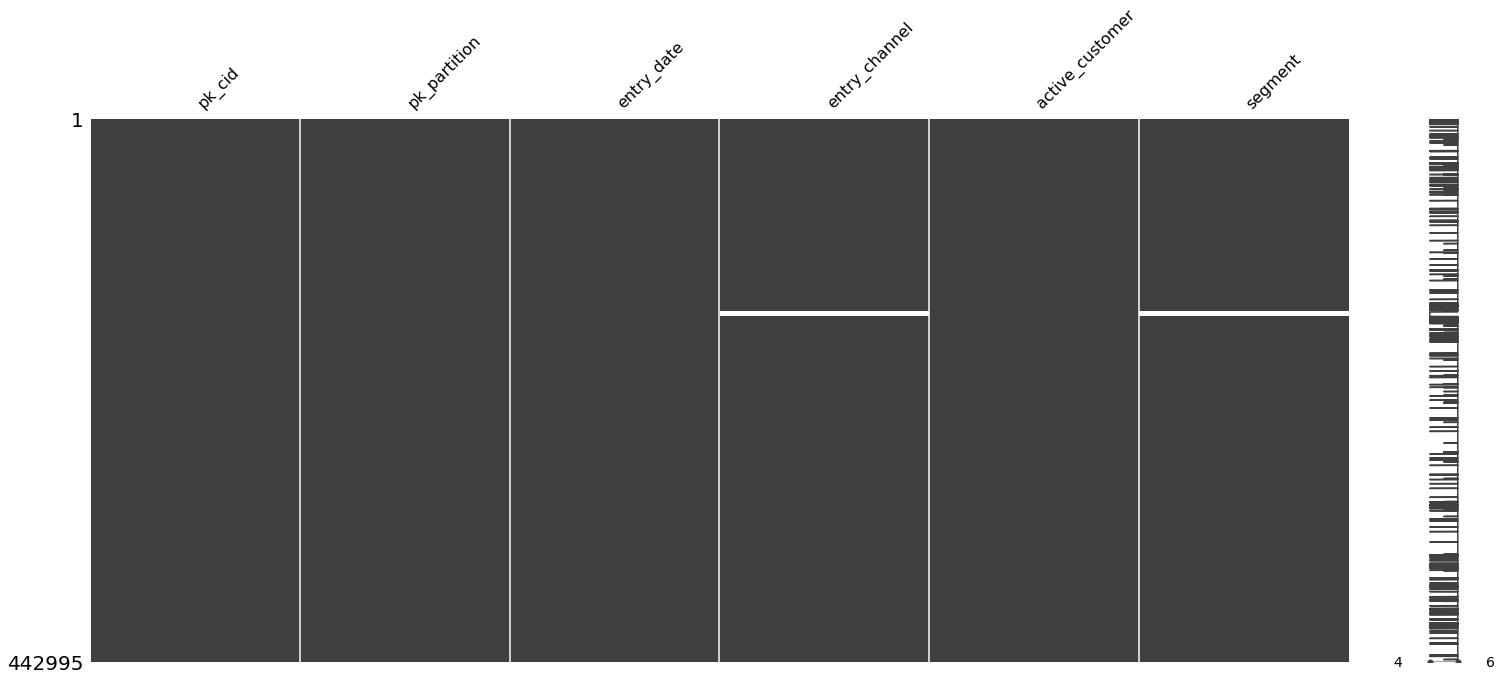

In [19]:
import missingno as msno 
  
# Visualize missing values as a matrix 
msno.matrix(commercial_activity_df) 
plt.show()

### Preprocessing

En esta parte se realizará una limpieza de los datos. Los pasos a seguir son los siguientes:

La información se conserva entre las particiones, pero puede hacer algunas discrepancias entre las particiones, y algunos datos pueden haber sido alterados. 
- Pasar la variable *entry_channel* y *segment* a category
    - Mirar que category es más predominante
- Pasar las variables *pk_partition* y *entry_date* a 'date'
    - Añadir variables de año, mes, dia, dia de la semana, año-mes

#### Comprobar si existen discrepancias entre particiones

En este apartado se comprobará que no existe duplicidad de las filas entre las particiones. El proceso para comprobar si existen duplicados se puede comprobar si:
- Si tan sólo aparece una fila para cada combincación de pk_cid, entry_date, entry_channel

https://appdividend.com/2020/03/07/python-pandas-find-duplicate-rows-in-dataframe-based-on-all-or-selected-columns/#:~:text=If%20you%20want%20to%20find,duplicated()%20function.

In [20]:
first_partition = commercial_activity_df[(commercial_activity_df['pk_partition']=='2018-01-28')]

print(first_partition.shape)

second_partition = commercial_activity_df[(commercial_activity_df['pk_partition']=='2018-02-28')] 
print(second_partition.shape)

first_two_partitions = pd.merge(first_partition, second_partition, on=['pk_cid', 'entry_date', 'entry_channel', 'segment'], how='outer', suffixes=['_1','_2'])

print(first_two_partitions.shape)

new_clients = first_two_partitions[ first_two_partitions['pk_partition_1'].isna() ] 
first_two_partitions = first_two_partitions.drop(index=new_clients.index)

print(first_two_partitions.shape)

(0, 6)
(0, 6)
(0, 8)
(0, 8)


#### Limpieza de categorías 

En este paso se codificarán las variables *entry_channel* y *segment* como category. Para ello primero se codifican los NaNs como 'Sin asignar'.

Pasar de object a category se consigue reducir el tamaño en la memoria del dataframe y simplificar el dataset en caso de que se desee realizar un one-line-enconding, por ejemplo.

In [21]:
commercial_activity_df['entry_channel'] = commercial_activity_df['entry_channel'].fillna('Sin Asignar')
commercial_activity_df['segment'] = commercial_activity_df['segment'].fillna('Sin Asignar')

In [22]:
# Obtener categorias entry_channel 
entry_channel_cats = commercial_activity_df['entry_channel'].unique()
display(entry_channel_cats)

print("Numero de categorias 'entry_channel': {}".format(entry_channel_cats.shape[0]))

array(['013', 'Sin Asignar', 'KAF', 'KAT', 'KFC', 'KHN', 'KHL', 'KHK',
       'KHM', 'KHE', 'KFA', 'KAR', '007', 'RED', 'KHC', 'KAA', 'KAG',
       'KCH', 'KHQ', 'KHO', 'KAZ', 'KAQ', 'KAJ', 'KAW', 'KBG', 'KAY',
       'KFD', 'KBH', 'KAE', 'KBY', 'KHD', 'KAM', 'KBZ', 'KCI', 'KAB',
       'KFL', 'KFP', 'KFS', 'KAH', 'KFF', 'KGX', 'KAS', 'KBE', 'KBU',
       'KBW', 'KEY', 'KCC', 'KAI', 'KAD', '004', 'KCB', 'KDR', 'KES',
       'KCL', 'KCK', 'KBO', 'KDT', 'KHF', 'KHP', 'KAK', 'KHS', 'KDH',
       'KEH', 'KGN', 'KFK', 'KGC'], dtype=object)

Numero de categorias 'entry_channel': 66


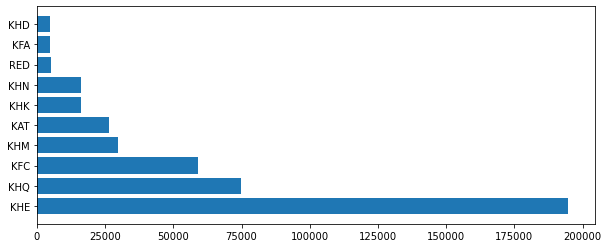

In [23]:
# top 10 entry_channel más usados
entry_channel_value_counts = commercial_activity_df['entry_channel'].value_counts()

entry_channel_value_counts = entry_channel_value_counts.sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=[10,4])
ax.barh(entry_channel_value_counts.index, entry_channel_value_counts[:])
plt.show()

In [24]:
# Obtener categorias segment 
segment_cats = commercial_activity_df['segment'].unique()
display(segment_cats)

print("Numero de categorias 'segment': {}".format(segment_cats.shape[0]))

array(['02 - PARTICULARES', 'Sin Asignar', '01 - TOP',
       '03 - UNIVERSITARIO'], dtype=object)

Numero de categorias 'segment': 4


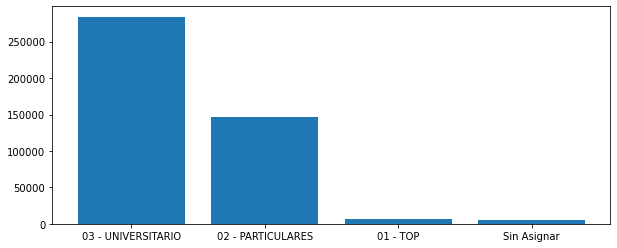

In [25]:
# Segments más usados

segment_value_counts = commercial_activity_df['segment'].value_counts()

segment_value_counts = segment_value_counts.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=[10,4])
ax.bar(segment_value_counts.index, segment_value_counts[:])
plt.show()

Se puede observar como hay categorias NaN. De todas maneras convertimos la columna a category. Más adelante, realizaremos una limpieza y decidiremos qué hacer con los NaNs en la columna de *segment*. 

En la siguiente figura se puede ver el numero de cuentas que corresponden a cada una de las categorias. Antes se ha asignado la categoria NaN como 'Sin Asignar' para que así aparezca en la figura.

**¿Qué realizamos con las categorias sin asignar?**

#commercial_activity_df['entry_channel'] = commercial_activity_df['entry_channel'].astype('category')
#assert commercial_activity_df['entry_channel'].dtype == 'category'

In [26]:
# Si menospreciamos 'Sin Asignar' tanto en segment como en 'entry_channel'
print('Dataframe con los NaNs:')
print(commercial_activity_df.shape)

print('Dataframe sin los NaNs de entry_channel:')
new_commercial_activity_df = commercial_activity_df[(commercial_activity_df['entry_channel'] != 'Sin Asignar')]
print(new_commercial_activity_df.shape)

print('Dataframe sin los NaNs de segment:')
new_commercial_activity_df = commercial_activity_df[(commercial_activity_df['segment'] != 'Sin Asignar')]
print(new_commercial_activity_df.shape)

print('Dataframe sin los NaNs de ambos:')
new_commercial_activity_df = commercial_activity_df[ (commercial_activity_df['entry_channel'] != 'Sin Asignar') & (commercial_activity_df['segment'] != 'Sin Asignar') ]
print(new_commercial_activity_df.shape)

Dataframe con los NaNs:
(442995, 6)
Dataframe sin los NaNs de entry_channel:
(438486, 6)
Dataframe sin los NaNs de segment:
(438379, 6)
Dataframe sin los NaNs de ambos:
(438349, 6)


Deshacerse de las filas en las que *entry_channel* o *segment* es nulo representa tan sólo el 1% de todas las filas. Por lo que se considera, que es un mal menor y deshacerse de estas filas es un paso correcto.

In [27]:
commercial_activity_df.shape[0] - new_commercial_activity_df.shape[0]
(commercial_activity_df.shape[0]-new_commercial_activity_df.shape[0])/commercial_activity_df.shape[0]*100

1.0487703021478798

In [28]:
commercial_activity_df = commercial_activity_df[ (commercial_activity_df['entry_channel'] != 'Sin Asignar') & (commercial_activity_df['segment'] != 'Sin Asignar') ]
print(commercial_activity_df.isna().sum())

pk_cid             0
pk_partition       0
entry_date         0
entry_channel      0
active_customer    0
segment            0
dtype: int64


Convertir las variables *entry_channel* y *segment* a category.

In [29]:
commercial_activity_df['entry_channel'] = commercial_activity_df['entry_channel'].astype('category')
commercial_activity_df['segment'] = commercial_activity_df['segment'].astype('category')

assert commercial_activity_df['entry_channel'].dtype == 'category'
assert commercial_activity_df['segment'].dtype == 'category'

De la variable de *active_customers* (variable boolean) se puede obtener los usuarios activos. Pero, ¿existe una fila para cada usuario, o un usuario puede aparecer en varios filas? Si la segunda opción es la verdadera para poder visualizar los usuarios activos (más recientes) habría que agrupar por usuario y quedarse con el valor de fila que tenga la fecha más reciente a la actual. 

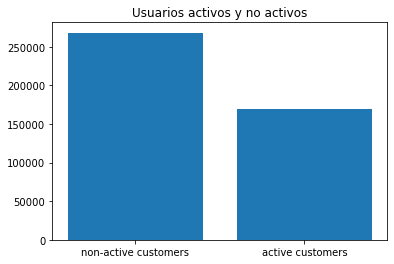

In [30]:
active_customers = commercial_activity_df['active_customer'].value_counts()

fig, ax = plt.subplots(figsize=[6,4])
ax.bar(['non-active customers','active customers'], active_customers[:] )
ax.set_title('Usuarios activos y no activos')
plt.show()

### Preparación de las variables fecha 
- Pasar las variables pk_partition y entry_date a 'date'
    - Añadir variables de año, mes, dia, dia de la semana, año-mes

In [ ]:
from datetime import datetime as dt
# 2015-02-29 = esta fecha no existe!

wrong_dates = {'2015-02-29': '2015-02-28', '2019-02-29':'2019-02-28'}
commercial_activity_df['entry_date'] = commercial_activity_df['entry_date'].replace(wrong_dates)

commercial_activity_df['entry_date'] = pd.to_datetime(commercial_activity_df['entry_date'], format='%Y-%m-%d')

commercial_activity_df['pk_partition'] = commercial_activity_df['pk_partition'].replace(wrong_dates)

commercial_activity_df['pk_partition'] = pd.to_datetime(commercial_activity_df['pk_partition'], format='%Y-%m-%d')

In [ ]:
commercial_activity_df['pk_partition_year'] = commercial_activity_df.pk_partition.dt.year
commercial_activity_df['pk_partition_month'] = commercial_activity_df.pk_partition.dt.month
commercial_activity_df['pk_partition_day'] = commercial_activity_df.pk_partition.dt.day
commercial_activity_df['pk_partition_dayofweek'] = commercial_activity_df.pk_partition.dt.dayofweek
commercial_activity_df['pk_partition_year_month'] = commercial_activity_df.pk_partition.dt.strftime('%Y-%m')

commercial_activity_df['entry_date_year'] = commercial_activity_df.entry_date.dt.year
commercial_activity_df['entry_date_month'] = commercial_activity_df.entry_date.dt.month
commercial_activity_df['entry_date_day'] = commercial_activity_df.entry_date.dt.day
commercial_activity_df['entry_date_dayofweek'] = commercial_activity_df.entry_date.dt.dayofweek
commercial_activity_df['entry_date_year_month'] = commercial_activity_df.entry_date.dt.strftime('%Y-%m')

#df['order_purchase_date'] = df.order_purchase_timestamp.dt.date
#df['order_purchase_year'] = df.order_purchase_timestamp.apply(lambda x: x.year)
#df['order_purchase_month'] = df.order_purchase_timestamp.apply(lambda x: x.month)
#df['order_purchase_dayofweek'] = df.order_purchase_timestamp.apply(lambda x: x.dayofweek)
#df['order_purchase_hour'] = df.order_purchase_timestamp.apply(lambda x: x.hour)
#df['order_purchase_day'] = df['order_purchase_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
#df['order_purchase_mon'] = df.order_purchase_timestamp.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
#df['order_count']=1
#df['year_month'] = df['order_purchase_timestamp'].dt.strftime('%Y-%m')